In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [20]:
df = pd.read_csv("hiring multi variables exercise.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [30]:
from word2number import w2n
import math

In [29]:
test_score = df['test_score(out of 10)']
mean = math.floor(test_score.mean())
test_score=test_score.fillna(mean)
test_score
df['test_score(out of 10)'] = test_score
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [32]:
df['experience'] = df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [35]:
words = df['experience']
words_int = []
for w in words:
    words_int.append(w2n.word_to_num(w))
    
words_int
df['experience'] = words_int
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [36]:
X = df.drop('salary($)', axis='columns')
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [37]:
y = df['salary($)']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [38]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [41]:
reg.predict([[2,9,6]])

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [42]:
reg.predict([[12,10,10]])

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

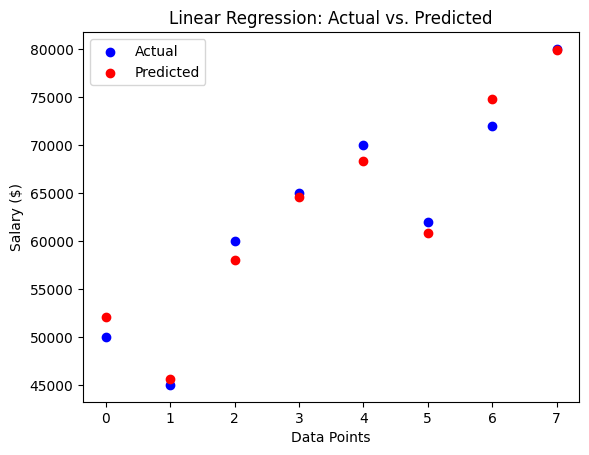

In [44]:
y_actual = y
y_pred = reg.predict(X)

# Plotting
plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Salary ($)')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()